### Evaluating differentiation level
---
#### [Method]
#### 1. heatmap (cluster map)
#### 2. PCA

In [1]:
# Import Library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Set Config
CONFIG = {
    "data_dir": "./data/TPM.csv"
    , "genes": ["NES", "MSI1", "HES1", "SOX1", "SOX2", "SOX3", "PAX6", "FABP7", "ID1"]
    , "color":sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "cbar": {"shrink": 0.8}
    , "sample": [("414C2", 0, 9), ("B7", 9, 18)]
    , "adopted_comp": (3, 4)
    , "CMsize": (5, 5)
    , "CMfontsize": 1.5
    , "CMrotation": (90, 0)
    , "CMcolor": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "CMsc": None
    , "CMdendrosize": (0.1, 0.1)
    , "CMcbarpos": (1.05, 0.15, 0.05, 0.7) 
}

In [3]:
# Load Data
rawdata = pd.read_csv(CONFIG['data_dir'], index_col=0).T

In [4]:
# Shape Data
data = np.log2(rawdata+1).sort_index()
data.index.name=None

data

Name,LOC102725121,DDX11L1,WASH7P,MIR6859-2,MIR6859-1,MIR6859-4,MIR6859-3,MIR1302-11,MIR1302-9,MIR1302-2,...,CSPG4P1Y (2),CDY1B (2),CDY1 (2),TTTY3 (2),TTTY3B (2),SPRY3 (2),VAMP7 (2),IL9R (2),WASIR1 (2),DDX11L16 (2)
414C2_C34,2.709088e-01,3.026497e-05,2.826296,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,1.557969,4.532566,0.000000,0.000000,0.258824
414C2_C34.1,8.863460e-02,4.776049e-05,2.577556,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,1.730658,4.421131,0.000000,0.000000,0.031834
414C2_C34.2,3.791742e-01,4.861411e-05,2.480490,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,1.604461,4.416055,0.226098,0.000000,0.164294
414C2_DAPT,2.226041e-01,3.028459e-06,2.488584,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.106806,0.0,0.0,0.0,0.0,0.918437,4.055322,0.000000,0.000000,0.120028
414C2_DAPT.1,3.479776e-06,1.428472e-01,2.807075,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,1.683035,4.252771,0.000000,0.000000,0.135410
414C2_DAPT.2,5.695375e-02,5.817781e-05,2.627739,0.0,0.0,0.0,0.0,0.490821,0.490821,0.490821,...,0.000000,0.0,0.0,0.0,0.0,1.340950,4.211741,0.000000,0.069945,0.082937
414C2_control,0.000000e+00,0.000000e+00,2.319389,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,1.615760,3.879794,0.000000,0.000000,0.075649
414C2_control.1,7.198199e-02,2.601018e-06,2.562228,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,1.186911,4.461470,0.000000,0.000000,0.247922
414C2_control.2,1.242482e-01,7.303069e-05,2.778043,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,1.343072,4.001194,0.000000,0.037948,0.036974
B7_C34,2.186625e-02,2.334351e-06,3.342845,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,2.105398,5.024548,0.321404,0.000000,0.031604


In [12]:
# Select cell-line/genes
df = [0 for k in range(len(CONFIG["sample"]))]
for k in range(0, len(CONFIG["sample"])):
    data.columns.name=CONFIG["sample"][k][0]
    df[k] = data.loc[:, CONFIG["genes"]].iloc[CONFIG["sample"][k][1]:CONFIG["sample"][k][2], :]

df[0]

414C2,NES,MSI1,HES1,SOX1,SOX2,SOX3,PAX6,FABP7,ID1
414C2_C34,6.324134,4.396193,5.274157,2.678940,8.262211,6.120095,3.365406,6.868349,2.741174
414C2_C34.1,6.321531,4.085851,5.653852,2.620857,8.013462,5.799456,3.264312,6.752954,5.002147
414C2_C34.2,5.713022,3.990378,5.196547,2.776596,8.091141,5.378055,3.381785,6.434544,3.440827
414C2_DAPT,7.011532,4.188927,5.243594,3.193575,8.096762,6.752245,2.967898,6.818955,4.388627
414C2_DAPT.1,6.643496,4.347838,5.149409,3.187979,8.008105,6.367791,3.616378,6.711029,2.960469
414C2_DAPT.2,6.303380,4.108016,5.083814,2.676590,8.129178,6.132311,3.064726,6.897215,2.639939
414C2_control,7.005581,4.095341,6.670289,3.008870,7.727040,6.334002,2.715278,7.585125,4.412682
414C2_control.1,7.036663,4.062967,7.038939,3.030782,7.921751,5.986034,2.518151,7.562006,4.882744
414C2_control.2,6.711510,4.088388,6.490367,2.951857,7.763696,6.282914,2.880647,7.568339,4.500803


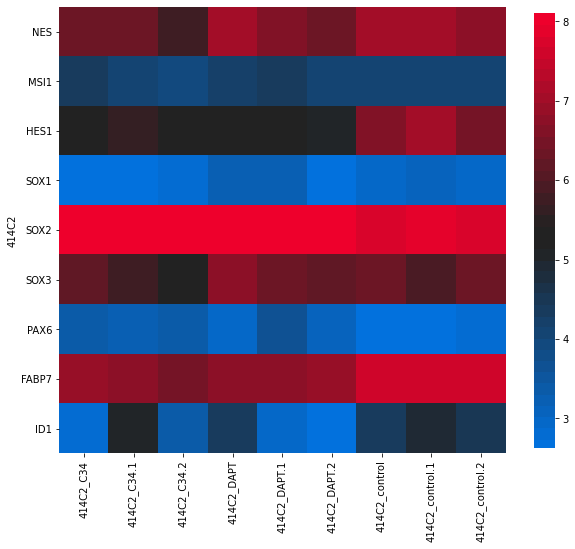

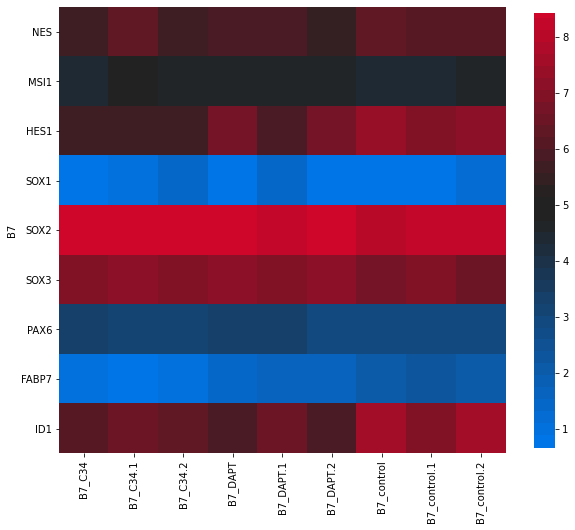

In [6]:
# TPM heatmap
for k in range(0, len(CONFIG["sample"])):
    plt.figure(figsize=(10, 10))
    sns.heatmap(df[k].T, cmap=CONFIG["color"], square=True, robust=True, center=df[k].mean().mean(), cbar=True, cbar_kws=CONFIG["cbar"])
    plt.yticks(rotation=0)
    plt.savefig(f"./figure/{CONFIG['sample'][k][0]}_stemness_HeatMap_TPM.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

In [7]:
# PCA
Rdata = [0 for k in range(len(CONFIG["sample"]))]
model = [0 for k in range(len(CONFIG["sample"]))]
for k in range(0, len(CONFIG["sample"])):
    model[k] = PCA(random_state=0)
    model[k].fit(df[k])
    Rdata[k] = pd.DataFrame(model[k].transform(df[k]), index=df[k].index, columns=[f"PC{i}"for i in range(1, min(len(df[k]), len(df[k].T))+1)])

In [11]:
# Contribution
temp = [0 for k in range(len(CONFIG["sample"]))]
cont = [0 for k in range(len(CONFIG["sample"]))]
for k in range(0, len(CONFIG["sample"])):
    temp[k] = [
        [f"{i:.2f}" for i in (model[k].explained_variance_ratio_ * 100)]
        , [f"{i:.2f}" for i in (model[k].explained_variance_ratio_.cumsum() * 100)]
    ]

    cont[k] = pd.DataFrame(temp[k]
            , index=['contribution [%]', 'cumulative contribution [%]']
            , columns=[f"PC_{i}" for i in range(1, min(len(df[k]), len(df[k].T))+1)]
                          ).T
    cont[k].to_csv(f"./table/{CONFIG['sample'][k][0]}_diff_contribution.csv", index=True)
cont[1]

,contribution [%],cumulative contribution [%]
PC_1,67.66,67.66
PC_2,18.76,86.42
PC_3,6.44,92.86
PC_4,3.74,96.60
PC_5,2.19,98.79
PC_6,1.09,99.88
PC_7,0.11,99.98
PC_8,0.02,100.00
PC_9,0.00,100.00


In [9]:
# Save Data as csv.
Pdata = [0 for k in range(len(CONFIG["sample"]))]
for k in range(0, len(CONFIG["sample"])):
    Pdata[k] = pd.DataFrame(model[k].transform(df[k])[:, :CONFIG["adopted_comp"][k]]
                            , columns=[f"PC{i}"for i in range(1, CONFIG["adopted_comp"][k]+1)]
                            , index=df[k].index
                           )
    Pdata[k].to_csv(f"./table/{CONFIG['sample'][k][0]}_stemness_PCA_data_n={CONFIG['adopted_comp'][k]}.csv", index=True)

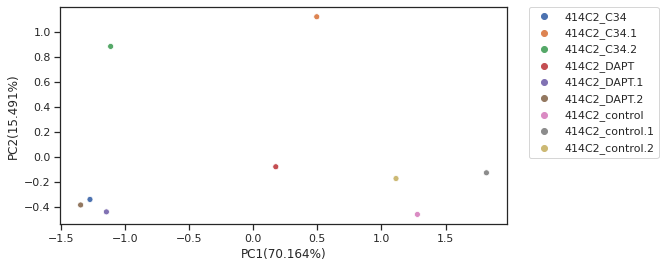

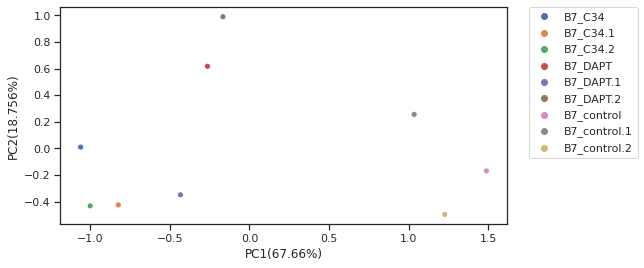

In [10]:
# Plot
for k in range(0, len(CONFIG["sample"])):
    sns.set() 
    sns.set_style('ticks')
    fig, ax = plt.subplots(figsize = (8,4))
    [pc1, pc2] = model[k].explained_variance_ratio_[0:2]
    PC1 = round(100*pc1, 3)
    PC2 = round(100*pc2, 3)
    sns.scatterplot(x="PC1", y="PC2", data=Pdata[k], hue=Pdata[k].index)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set(xlabel=f"PC1({PC1}%)",ylabel=f"PC2({PC2}%)")

In [13]:
# Correlation
cor = [0 for k in range(len(CONFIG["sample"]))]
for k in range(0, len(CONFIG["sample"])):
    cor[k] = Pdata[k].T.corr()
    cor[k].columns.name=CONFIG["sample"][k][0]

<Figure size 360x360 with 0 Axes>

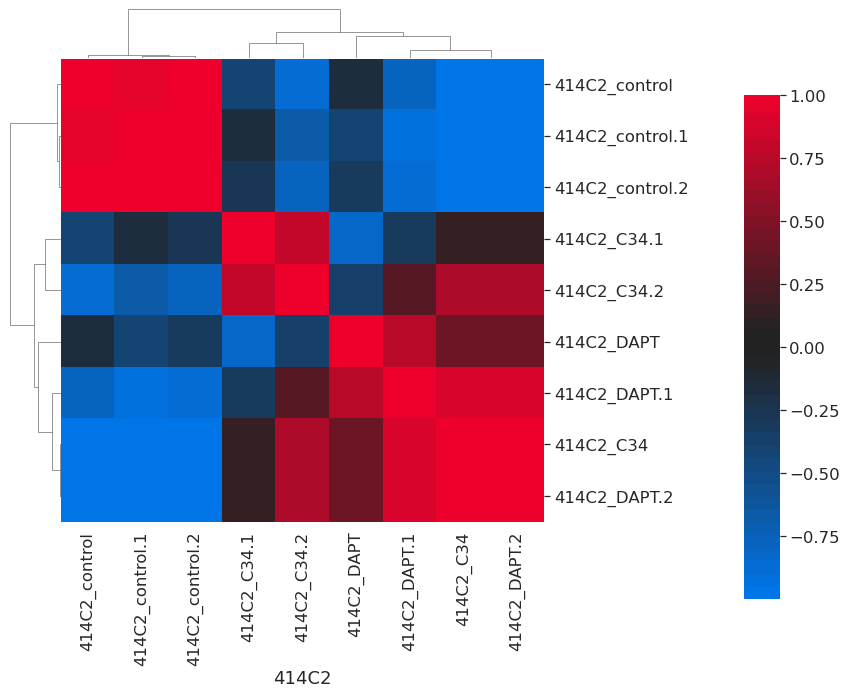

<Figure size 360x360 with 0 Axes>

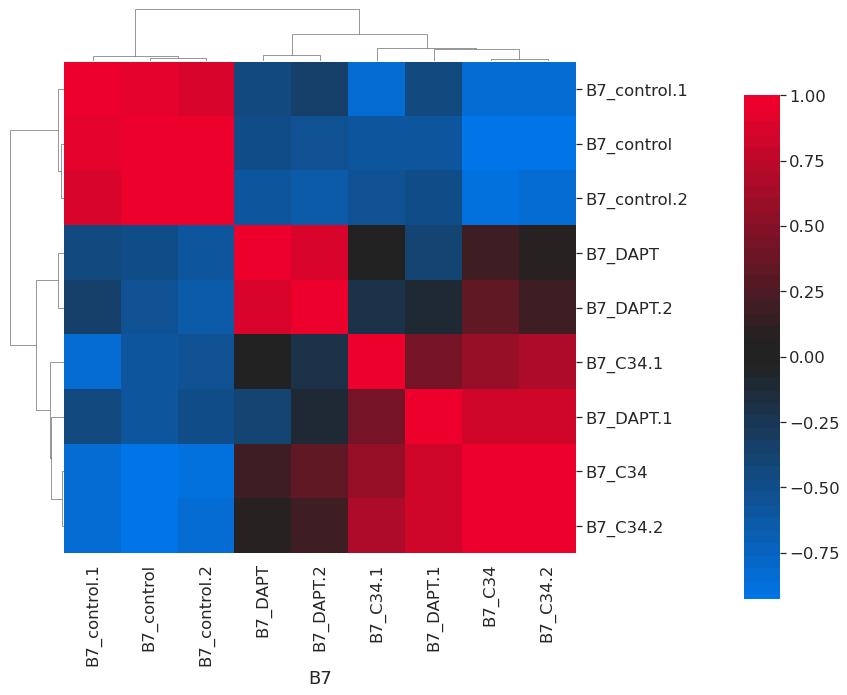

In [14]:
# Cluster Map
CM = [0 for k in range(len(CONFIG["sample"]))]
for k in range(0, len(CONFIG["sample"])):
    plt.figure(figsize=CONFIG["CMsize"])
    sns.set(font_scale=CONFIG["CMfontsize"])
    CM[k] = sns.clustermap(cor[k]
               , cmap=CONFIG["CMcolor"]
               , robust=True
               , center=cor[k].mean().mean()
               , row_colors=CONFIG["CMsc"]
               , col_colors=CONFIG["CMsc"]
               , dendrogram_ratio=CONFIG["CMdendrosize"]
               , cbar_pos=CONFIG["CMcbarpos"]
              )
    plt.setp(CM[k].ax_heatmap.get_xticklabels(), rotation=CONFIG["CMrotation"][0])
    plt.setp(CM[k].ax_heatmap.get_yticklabels(), rotation=CONFIG["CMrotation"][1])
    plt.savefig(f"./figure/{CONFIG['sample'][k][0]}_PCA_ClusterMap_n={CONFIG['adopted_comp'][k]}.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)